# Gapminder Data Visualization

##### This Jupyter Notebook (JN) uses Python to visualize existing GDP data from the Gapminder Foundation. These visualizations rely on two Python modules, matplotlib and pandas. All code necessary to run these visualizations is contained below, including code that loads the two requisite Python modules for you.

To begin, we will load in the appropriate Python modules, matplotlib and pandas. The syntax below means that we can "call" or reference both matplotlib and pandas with the shorthand plt and pd, respectively. There is strong convention within the Python community to use plt and pd as the standard shorthand for their respective modules and we follow that convention here.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

We will now plot a very simple graph with some arbitrary data that we create. The arbitrary data below consists of two lists, "time" and "position," each of which contains a list of four numbers. We plot these numbers in a simple graph to confirm that our matplotlib module is loaded and functioning.

<blockquote><i>Note the syntax plt.plot, plt.xlabel, plt.ylabel, etc. This code is referencing the matplotlib module using our designated shorthand, plt.</blockquote></i>

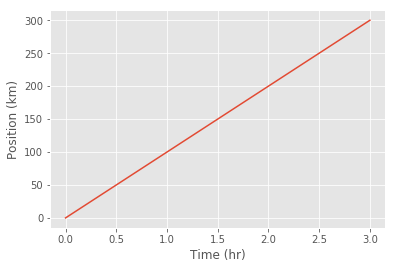

In [44]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

Now we can start working with the Gapminder data. Here we have included the code for loading the pandas module, even though we've already loaded it, to better illustrate some of the functionality of the pandas module. Pandas allows us to load a dataset into our Python program. In this case, we are loading up gapminder_gdp_oceania.csv and are assigning this dataset to the variable "data". This variable will function in much the same way as the shorthand we used to access matplotlib and pandas. Note that although variable names can be anything, it is considered good practice to use variable names that relate to, or in some way otherwise elicit, the dataset that you are assigning to the variable. Choosing helpful variable names will not only allow others to more easily read and understand your code down the line, but will also help you stay organized as you write your code.

>*Our code was written to look for our dataset in the same directory as this JN, in a folder called "data". However, if your CSVs are in a different directory, you can simply input your correct directory address in place of data/gapminder_gdp_oceania.csv -- just be sure to include quotation marks around your directory, for example:*
>
>*`pd.read_csv('c:\users\yourname\downloads\data\gapminder_gdp_oceania.csv', index_col='country')`*

You'll notice we are also assigning the column named 'country' as our index. An index refers to a position within an ordered list. In our case, the name of the country makes the most sense.

In [2]:
import pandas as pd

# switching to reading in tab delimited file (the format dataverse converts csv to)
#data = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')
data = pd.read_csv('data/gapminder_gdp_oceania.tab', index_col='country', sep='\t')

print(data.head())

             gdpPercap_1952  gdpPercap_1957  gdpPercap_1962  gdpPercap_1967  \
country                                                                       
Australia       10039.59564     10949.64959     12217.22686     14526.12465   
New Zealand     10556.57566     12247.39532     13175.67800     14463.91893   

             gdpPercap_1972  gdpPercap_1977  gdpPercap_1982  gdpPercap_1987  \
country                                                                       
Australia       16788.62948     18334.19751     19477.00928     21888.88903   
New Zealand     16046.03728     16233.71770     17632.41040     19007.19129   

             gdpPercap_1992  gdpPercap_1997  gdpPercap_2002  gdpPercap_2007  
country                                                                      
Australia       23424.76683     26997.93657     30687.75473     34435.36744  
New Zealand     18363.32494     21050.41377     23189.80135     25185.00911  


With <code>print(data)</code> we can see that our CSV has been properly loaded and assigned to the "data" variable. Next we'll want to clean and standardize the data to make it easier for us to work with. The first thing we'll do is simplify column names. In addition to the 'country' column we have columns that refer to different dates. Fortunately these date columns all follow the same naming convention, which will make it that much easier to clean the data. Common to all date columns is that the column name always starts with "gdpPercap_XXXX" where "XXXX" refers to the four digit year. For clarity, we're going to remove the first portion of each column name using the .strip() function, leaving behind only the year.

<blockquote><i>If you're curious, once you have your csv loaded into your 'data' variable, you can check to see what the columns are named by using the following code:<br><br>
<code>print(data.columns)</code><br><br> You should see a list of strings like this:<br><br> Index(['gdpPercap_1952', 'gdpPercap_1957', 'gdpPercap_1962', 'gdpPercap_1967',
       'gdpPercap_1972', 'gdpPercap_1977', 'gdpPercap_1982', 'gdpPercap_1987',
       'gdpPercap_1992', 'gdpPercap_1997', 'gdpPercap_2002', 'gdpPercap_2007'],
      dtype='object')</blockquote></i>


Those names are unnecessarily long, and we are only interested in the dates. In programming parlance, we are going to remove each instance of a string, or set of characters. In our case, this means going through each column in the dataset and removing all instances of our string. Surprisingly, this is very simple to do and can be done with a single line of code:

In [46]:
years = data.columns.str.strip('gdpPercap_')

<blockquote><i>The syntax here is relatively simple. We are telling the program to create the variable years, to which we are going to access our other variable, data. However, from that variable we want only the column headers, which we communicate with the .columns addition. Furthermore, because the .strip() command only works on strings, we need to make sure that everything that is being parsed during our .strip() command is a string. We do that by simply adding a .str to our line of code. In plain English, data.columns.str.strip('gdpPercap_') says from the variable data, access each column, turn the value into a string, and then strip all strings that are an exact match of gdpPercap_</blockquote></i>

Now we have a variable named years that contains a list of the corrected column names. We can check with:

In [47]:
print(years)

Index(['1952', '1957', '1962', '1967', '1972', '1977', '1982', '1987', '1992',
       '1997', '2002', '2007'],
      dtype='object')


Now we need to rename each column with the corresponding date in our list. During this step we also need to convert these numbers from strings into integers. Converting to integers is necessary for our matplotlib module to work.

The following code is reassigning values to the columns in our dataset while simultaneously converting these values into integers:

In [48]:
data.columns = years.astype(int)

data.columns will iterate over each column name just like before, but this time instead of reading these values we are going to assign new values to each. Specifically we are iterating through our list, years, and assigning each of those values to our columns as integers. Now if we were to print the columns, instead of the clunky list we saw before we should see a list of dates, exactly like we saw in our years variable:

In [49]:
print(data.columns)

Int64Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
            2007],
           dtype='int64')


Now that our data's been sufficiently cleaned we can start plotting data directly from our variable, data, which contains what is known as a Pandas dataframe. Let's plot a quick line graph:

<blockquote><i>For more information on Pandas dataframes, follow this link:</i><br> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html </blockquote>

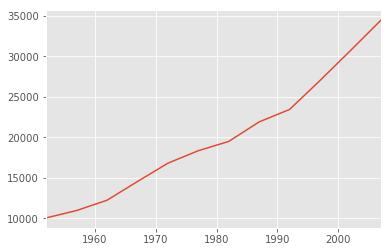

In [50]:
data.loc['Australia'].plot()

Now we can use the `T` function to transpose the data, so instead of having `gdpPercap_<year>` in the colums across the top, we have Australia, New Zealand and the gdpPercap years as columns.   We can print this out to see: 

In [5]:
data.T

country,Australia,New Zealand
gdpPercap_1952,10039.59564,10556.57566
gdpPercap_1957,10949.64959,12247.39532
gdpPercap_1962,12217.22686,13175.67800
gdpPercap_1967,14526.12465,14463.91893
gdpPercap_1972,16788.62948,16046.03728
gdpPercap_1977,18334.19751,16233.71770
gdpPercap_1982,19477.00928,17632.41040
gdpPercap_1987,21888.88903,19007.19129
gdpPercap_1992,23424.76683,18363.32494
gdpPercap_1997,26997.93657,21050.41377


Now let's plot it. 

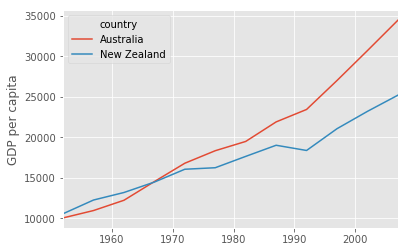

In [51]:
data.T.plot()
plt.ylabel('GDP per capita')

There are many preconfigured styles for graphs. Next we'll use one called "ggplot" to make a bar graph. Note the x-axis ticks are now vertical, allowing for more dates to fit into the same amount of space.

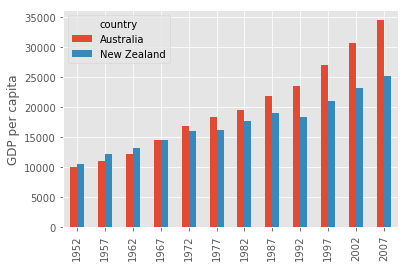

In [52]:
plt.style.use('ggplot')
data.T.plot(kind='bar')
plt.ylabel('GDP per capita')

So far we've only been using Python's most basic graphing functions. For more detailed or otherwise more sophisticated graphs, we'll need to use the plot function from the matplotlib module.

Up until now we've relied on Python's default plotting behavior to produce our graphs. Modules like matplotlib allow us to exercise more granular control over our data. As an example, next we'll make two variables that we will use to fill in our x- and y- axis data: years will be our x-axis values and gdp_australia will be our y-axis values. The three comma-separated values that are contained within the .plot parentheses are not only how we control which of our data we want to feed into our graph, but also allow us to customize the visualizations. In the following example, our .plot() function has input values for our graph's x-axis, y-axis, and the style of our line (in this case, a green dashed line represented by 'g--'):

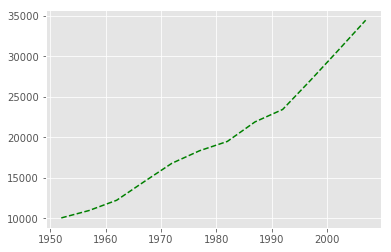

In [53]:
years = data.columns
gdp_australia = data.loc['Australia']

plt.plot(years, gdp_australia, 'g--')

Matplotlib enables us to plot multiple sets of data together on the same graph. In addition to assigning our x-axis values to a variable, this time we'll also assign values to our y-axis. Let's also add some labels to each axis, as well as a legend to label our lines. Note that it appears as though we only gave instructions on the location of the legend. In reality, matplotlib is able to populate the legend because we gave each of our line plots a label in our .plot() function. Moreover, specifying the location of the legend is optional; matplotlib will try and place the legend in a suitable place on its own by default.

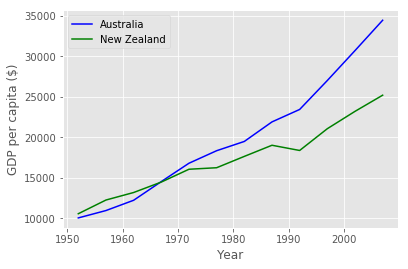

In [54]:
# Select two countries' worth of data.
gdp_australia = data.loc['Australia']
gdp_nz = data.loc['New Zealand']

# Plot with differently-colored markers, add x- and y-axis labels.
plt.plot(years, gdp_australia, 'b-', label='Australia')
plt.plot(years, gdp_nz, 'g-', label='New Zealand')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')

In addition to line graphs, matplotlib can produce many other types and styles of graph, such as a scatter plot. To make one all we have to do is use the .scatter() function in much the same way as we used the .plot() function. In fact, even though we are currently working in a different code block, the variables that we've created up until this point are still valid and accessible. Let's use the same variables as before to populate our scatter plot's x- and y-axis:

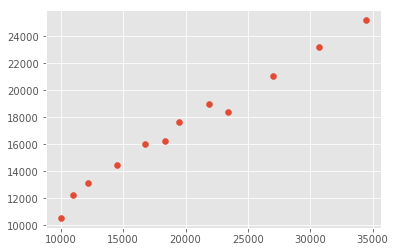

In [55]:
plt.scatter(gdp_australia, gdp_nz)

Programming languages like Python more often than not allow for multiple different solutions to the same problem. As a small example, we'll use a different method for labeling our axes:

# Again, Tim, not sure what the .T is here.

T will flip the data like excel transpose does. 

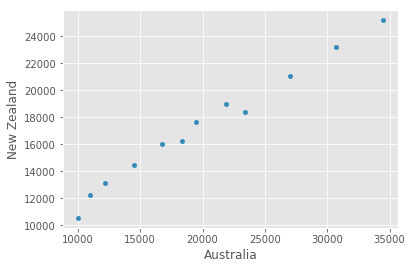

In [56]:
data.T.plot.scatter(x = 'Australia', y = 'New Zealand')

Many functions in Python can be chained together using what's called a method chain. Method chaining slims down your code, not only saving you space but also often making your code easier for other's read and understand. Let's import some new data and plot a graph using method chaining and the .min() and .max() functions.

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text major ticklabel objects>)

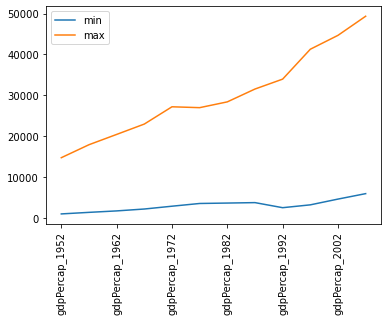

In [9]:
# changing to tab here too
data_europe = pd.read_csv('data/gapminder_gdp_europe.tab', index_col='country', sep='\t')
data_europe.min().plot(label='min')
data_europe.max().plot(label='max')
plt.legend(loc='best')
plt.xticks(rotation=90)

Visualizing data like this can help researchers make quick, broad analyses of a given dataset, thereby helping to reveal interesting relationships in the data. Such analyses also often reveal new lines of inquiry to scholars. For example, what (if any) relationship do you see between the minimum and maximum GDP per capita data among Asian countries for each year in the dataset? We can produce a scatter plot to help us answer this question:

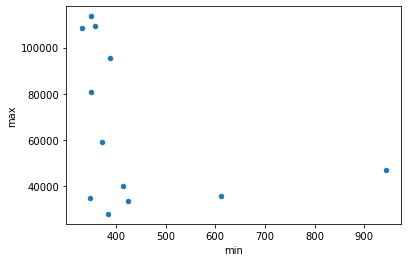

In [10]:
data_asia = pd.read_csv('data/gapminder_gdp_asia.tab', index_col='country', sep='\t')
data_asia.describe().T.plot(kind='scatter', x='min', y='max')

It appears as though there are no particular relationships, nor any obvious correlations between the min and max GDP values year by year. The fortunes of Asian countries, according to this data, do not rise and fall together. However, the graph does show us that there is a lot more variability among the maximum values than the minimum values. To investigate, let's take a look at those max values and their corresponding index. (Recall that we set our index to be the unique values in the 'country' column.)

# Tim: how do we rotate the xticks for this graph? It matches the solution on SWC, but the xticks aren't legible like this. Also am not sure why the lesson is having us print out country names without any GDP max values.

https://pandas.pydata.org/pandas-docs/version/0.15.2/generated/pandas.DataFrame.plot.html

in there there's a paramater `rot` and you can set it to a integer, 45 is 45 degrees. 

I deleted the min and max, don't think you need it. 

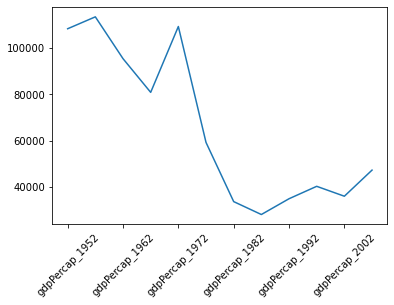

In [18]:
data_asia = pd.read_csv('data/gapminder_gdp_asia.tab', index_col='country', sep='\t')
data_asia.max().plot(rot = 45)

The graph reveals a precipitous drop after 1972, possibly alluding to some kind of global, geopolitical event.

Our Gapminder datasets also includes life expectancy data. The following short code block will show the correlation between a country's life expectancy and its GDP for 2007, normalizing marker size by population using the scatter plot's s argument:

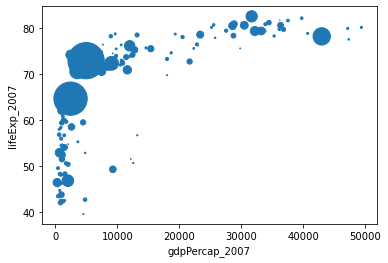

In [12]:
data_all = pd.read_csv('data/gapminder_all_data.tab', index_col='country', sep='\t')
data_all.plot(kind='scatter', x='gdpPercap_2007', y='lifeExp_2007',
              s=data_all['pop_2007']/1e6)

Lastly, let's download some of these graphs by using the .savefig() function:

In [61]:
plt.savefig('my_figure.png')

In this example, your graph will be saved as a PNG file called "my_figure" and will be saved to your current working directory. If you are unsure of your current working directory, you can simply type "pwd", which stands for Print Working Directory, and then run it and Python will print your current working directory. You can change the file format by changing the file extension to one of the other available formats: pdf, ps, eps, and svg.

In [62]:
pwd

'C:\\Users\\ddaniels\\Downloads'

It is often the case that when you work with dataframes, your data is generated and plotted to screen in a single line, and the plt.savefig() function doesn't seem viable. A possible workaround is to assign a reference to your figure to a local variable using plt.gcf(), and to then use the .savefig() function on your variable:

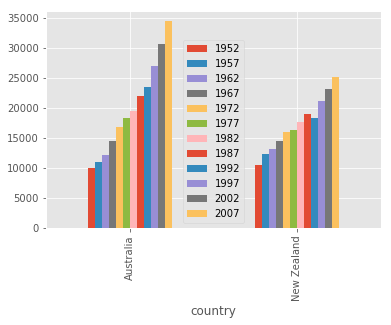

In [63]:
fig = plt.gcf() # get current figure
data.plot(kind='bar')
fig.savefig('my_figure.png')
